# E-Ticaret Yorum Analizi

In [724]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [725]:
data = pd.read_csv("e-ticaret_urun_yorumlari.csv", delimiter=';')
df = pd.DataFrame(data)

## Noktalama Isaretlerinin Kaldirilmasi ve Tum karakterlerin Kucuk Harflere Donusturulmesi

In [726]:
df.head()

,Metin,Durum
0,evet anlatıldığı gibi,1
1,Daha öncede almıştım bu cihazdan ense ve sakal...,1
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,1
3,Daha öncede aynısını almıştım çok güzel ve kal...,1
4,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1


### VERI ON ISLEME
Modelimizi egitmeden once veri on islemeye tabi tutmaliyiz. Yorumlari olumlu ya da olumsuz olarak analiz edecegimiz icin onemli olan karakterlerin yan yana gelmesi degil, kelimelerin yan yana gelerek olusturdugu kombinasyonlar olacaktir. Ornegin; 'fena degil' ve 'bekledigim gibi degil' seklinde yapilmis olan iki yorumu ele alirsak, ikisi de degil kelimesini iceriyor. Ancak ilki olumlu bir yorum iken, ikincisi olumsuz bir yorumdur. Bundan dolayi modeli egitirken dikkate alacagimiz nokta kelimelerin birbirine gore siralanisi olacaktir. 

Cumlelerde yer alan buyuk ve kucuk harfler anlam icin bir sey ifade etmiyor. Bundan dolayi tum harfleri kucuk harflere donusturecegiz. Ikinci olarak ise veri kumemiz yorumlardan olustugu icin noktalama isaretleri normal sartlarda anlama cak fazla etkiliyorken, burada yapilmis hatali noktalamalar olabilir. Bundan dolayi noktalama isaretklerini kaldirdigimiz ve kaldirmadigimiz verilerle iki farkli model olusturup, performansi daha iyi olanla calismaya devam edecegiz. Son olarak da veri kumemiz icinde yapilmis olan birbiri ile ayni yorumlar da bulunacaktir. Bu yorumlari da veri kumemizden cikartarak bir model egitimi denemesi daha yapacagiz ve ayni olan yorumlarin model performansina olan etkisini gorecegiz.

In [727]:
def cleaner(text):
    for trash in string.punctuation:
        text = text.replace(trash, "")
    text = text.lower()
    return text

In [728]:
df['Metin'] = df['Metin'].apply(cleaner)

In [729]:
df.head()

,Metin,Durum
0,evet anlatıldığı gibi,1
1,daha öncede almıştım bu cihazdan ense ve sakal...,1
2,ürün gayet başarılı sakal kesmede başlık sayıs...,1
3,daha öncede aynısını almıştım çok güzel ve kal...,1
4,erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1


In [730]:
duplicate_rows = df[df['Metin'].duplicated()]
duplicate_count = len(duplicate_rows)
print("Birbirine aynı olan veri sayısı:", duplicate_count)

Birbirine aynı olan veri sayısı: 1865


In [731]:
print(df.isnull().sum())

Metin    0
Durum    0
dtype: int64


In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15170 entries, 0 to 15169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Metin   15170 non-null  object
 1   Durum   15170 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 237.2+ KB


In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15170 entries, 0 to 15169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Metin   15170 non-null  object
 1   Durum   15170 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 237.2+ KB


In [734]:
df.describe()

,Durum
count,15170.000000
mean,0.631839
std,0.645211
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


/tmp/ipykernel_6724/1050939498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Durum', data=df, palette='mako')


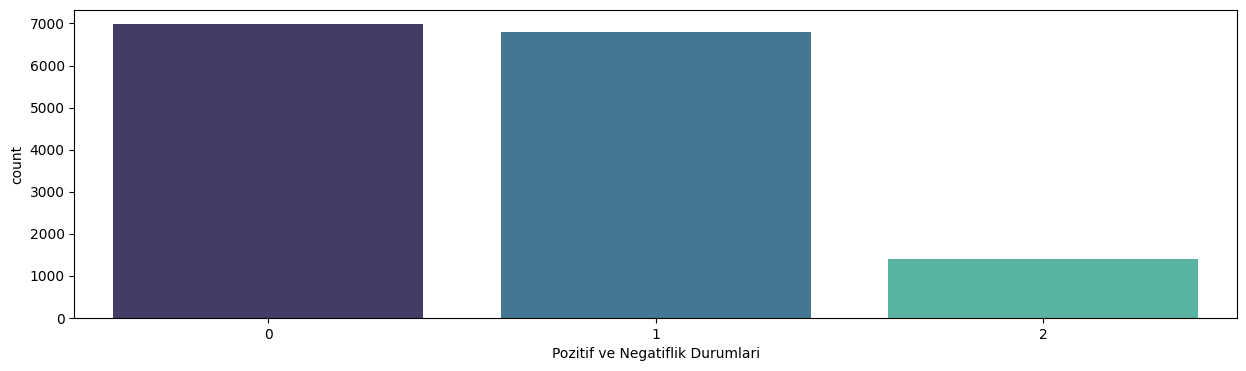

In [735]:
plt.figure(figsize=(15,4))
sns.countplot(x='Durum', data=df, palette='mako')
plt.xlabel('Pozitif ve Negatiflik Durumlari')
plt.show()

In [736]:
X = df['Metin']
Y = df['Durum']

In [737]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [738]:
from sklearn import feature_extraction

vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2), analyzer='word')

In [739]:
from sklearn import pipeline
from sklearn import linear_model

model = pipeline.Pipeline([('vec', vec), ('clf', linear_model.LogisticRegression())])

In [740]:
model.fit(X_train, Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [741]:
pred = model.predict(X_test)

In [742]:
from sklearn import metrics
print("Noktalama isaretleri kaldirilmis veriler ile hazilanan model.")
score1 = metrics.accuracy_score(Y_test,pred)

Noktalama isaretleri kaldirilmis veriler ile hazilanan model.


In [743]:
model.predict(['çok beğendim tekrar alacağım'])

array([1])

## Verideki Yalnizca Buyuk Harflerin Kucuk Harflere Donusturulmesi

In [744]:
df2 = pd.DataFrame(data)

In [745]:
df2.head()

,Metin,Durum
0,evet anlatıldığı gibi,1
1,Daha öncede almıştım bu cihazdan ense ve sakal...,1
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,1
3,Daha öncede aynısını almıştım çok güzel ve kal...,1
4,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1


In [746]:
def only_lower(text):
    text = text.lower()
    return text

In [747]:
df2['Metin'] = df2['Metin'].apply(only_lower)

In [748]:
df.head()

,Metin,Durum
0,evet anlatıldığı gibi,1
1,daha öncede almıştım bu cihazdan ense ve sakal...,1
2,ürün gayet başarılı sakal kesmede başlık sayıs...,1
3,daha öncede aynısını almıştım çok güzel ve kal...,1
4,erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1


In [749]:
duplicate_rows = df2[df2['Metin'].duplicated()]
duplicate_count = len(duplicate_rows)
print("Birbirine aynı olan veri sayısı:", duplicate_count)

Birbirine aynı olan veri sayısı: 1768


In [750]:
print(df2.isnull().sum())

Metin    0
Durum    0
dtype: int64


In [751]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15170 entries, 0 to 15169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Metin   15170 non-null  object
 1   Durum   15170 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 237.2+ KB


In [752]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15170 entries, 0 to 15169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Metin   15170 non-null  object
 1   Durum   15170 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 237.2+ KB


In [753]:
df2.describe()

,Durum
count,15170.000000
mean,0.631839
std,0.645211
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


/tmp/ipykernel_6724/4186910458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Durum', data=df2, palette='mako')


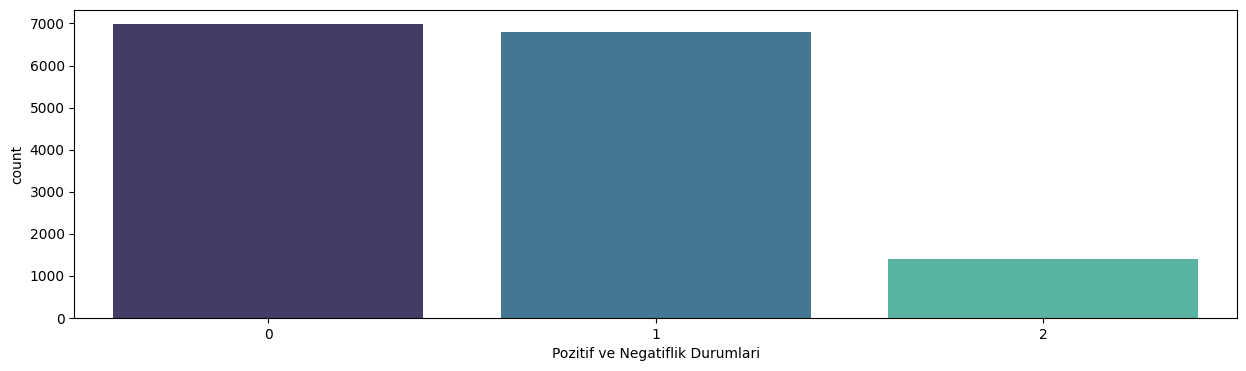

In [754]:
plt.figure(figsize=(15,4))
sns.countplot(x='Durum', data=df2, palette='mako')
plt.xlabel('Pozitif ve Negatiflik Durumlari')
plt.show()

In [755]:
X2 = df2['Metin']
Y2 = df2['Durum']

In [756]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=42)

In [757]:
vec2 = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2), analyzer='word')

In [758]:
model2 = pipeline.Pipeline([('vec2', vec2), ('clf', linear_model.LogisticRegression())])

In [759]:
model2.fit(X_train2, Y_train2)

Pipeline(steps=[('vec2', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [760]:
pred2 = model2.predict(X_test2)

In [761]:
print("Noktalama isaretleri kaldirilmamis veriler ile hazilanan model.")
score2 = metrics.accuracy_score(Y_test2,pred2)

Noktalama isaretleri kaldirilmamis veriler ile hazilanan model.


## Modeldeki Buyuk Harflerin Kucuk Harflere Donusturulmesi ve Birbirinin Aynisi Olan Verilerin Temizlenmesi

In [762]:
df3 = pd.DataFrame(data)
df3.head()

,Metin,Durum
0,evet anlatıldığı gibi,1
1,Daha öncede almıştım bu cihazdan ense ve sakal...,1
2,Ürün gayet başarılı sakal kesmede başlık sayıs...,1
3,Daha öncede aynısını almıştım çok güzel ve kal...,1
4,Erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1


In [763]:
df3['Metin'] = df3['Metin'].apply(cleaner)

In [764]:
df3.head()

,Metin,Durum
0,evet anlatıldığı gibi,1
1,daha öncede almıştım bu cihazdan ense ve sakal...,1
2,ürün gayet başarılı sakal kesmede başlık sayıs...,1
3,daha öncede aynısını almıştım çok güzel ve kal...,1
4,erkek kuaförüyüm ense ve sıfır sakal traşı içi...,1


In [765]:
duplicate_rows = df3[df['Metin'].duplicated()]
duplicate_count = len(duplicate_rows)
print("Birbirine aynı olan veri sayısı:", duplicate_count)

Birbirine aynı olan veri sayısı: 1865


In [766]:
print(df3.isnull().sum())

Metin    0
Durum    0
dtype: int64


In [767]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15170 entries, 0 to 15169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Metin   15170 non-null  object
 1   Durum   15170 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 237.2+ KB


In [768]:
df3 = df3.drop_duplicates(subset=['Metin'])

In [769]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13305 entries, 0 to 15169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Metin   13305 non-null  object
 1   Durum   13305 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 311.8+ KB


In [770]:
df3.describe()

,Durum
count,13305.000000
mean,0.610973
std,0.652968
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


/tmp/ipykernel_6724/2903763265.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Durum', data=df3, palette='mako')


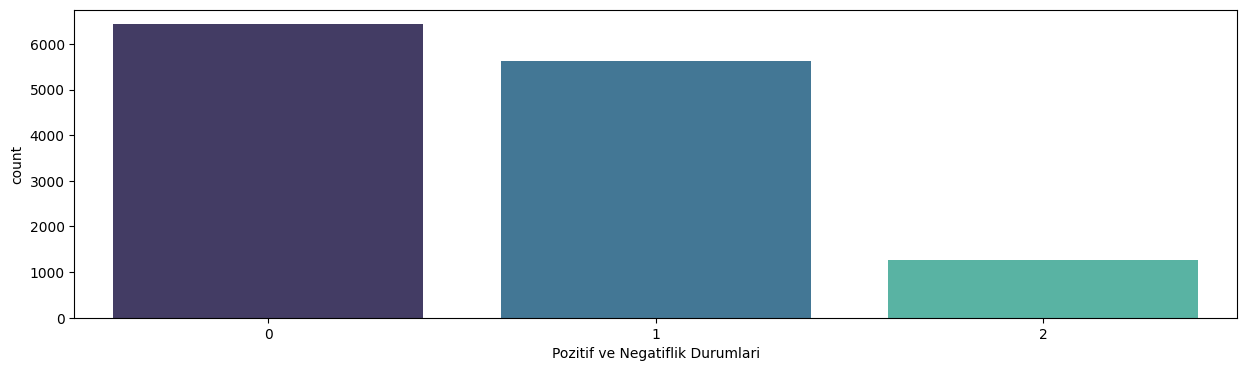

In [771]:
plt.figure(figsize=(15,4))
sns.countplot(x='Durum', data=df3, palette='mako')
plt.xlabel('Pozitif ve Negatiflik Durumlari')
plt.show()

In [772]:
X3 = df3['Metin']
Y3 = df3['Durum']

In [773]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size=0.3, random_state=42)

In [774]:
vec3 = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2), analyzer='word')

In [775]:
model3 = pipeline.Pipeline([('vec3', vec3), ('clf', linear_model.LogisticRegression())])

In [776]:
model3.fit(X_train3, Y_train3)

Pipeline(steps=[('vec3', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [777]:
pred3 = model3.predict(X_test3)

In [778]:
print("Birbirinin aynisi olan yorumlar kaldirildiginda.")
score3 = metrics.accuracy_score(Y_test3,pred3)

Birbirinin aynisi olan yorumlar kaldirildiginda.


## Model Performanslari

In [779]:
print("Noktalama isaretleri kaldirilmis veriler ile hazilanan model ======================================> " + str(score1))
print("Noktalama isaretleri kaldirilmamis veriler ile hazilanan model ====================================> " + str(score2))
print("Birbirinin aynisi olan yorumlarin ve buyuk kucuk harf duyarliliginin kaldirildigi model ===========> " + str(score3))

Noktalama isaretleri kaldirilmis veriler ile hazilanan model ======================================> 0.8877169852779608
Noktalama isaretleri kaldirilmamis veriler ile hazilanan model ====================================> 0.8918918918918919
Birbirinin aynisi olan yorumlarin ve buyuk kucuk harf duyarliliginin kaldirildigi model ===========> 0.8767535070140281


## SONUC

Sonuc olarak da noktalama isaretlerinin anlam butunlugune etkisi oldugu icin az da olsa modelin performansini etkiliyor. Modeli noktalama isaretlerini de kullanarak egitmek daha iyi bir secenek. Ayni zamanda birbirini tekrar eden verilerin belirli bir miktarin uzerine cikildiginda asiri ogrenmeye neden olabilecegi gibi, yeteri kadar tekrar olmasi da modelin performansini iyilestirir.